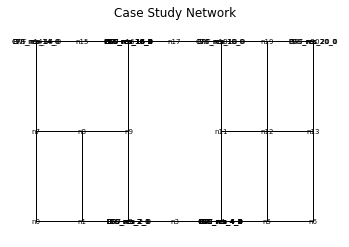

In [1]:
import wntr
import numpy as np
import numpy as np
import System
import copy
import Priorities
import Plotting

    
# %% Script defines the virtual community used for the iReCoDeS paper (2020)

# %% Define considered R/Ss
considered_utilities = ['ElectricPower', 'HighLevelCommunication',
                                     'LowLevelCommunication', 'PotableWater', 
                                     'CoolingWater']

considered_transfer_services = ['ElectricPowerTransferService', 
                                'PotableWaterTransferService', 
                                'CoolingWaterTransferService',
                                'BridgeTransferService']

# %% Define shape file
num_localities = 21
x_coordinates = np.reshape([[i * 5 for i in range(int(num_localities/3))] for _ in range(3)], (-1)) # [km]
y_coordinates = np.reshape([[i * 5 for i in range(int(num_localities/7))] for _ in range(7)], (-1)) # [km]
shape = [{'LocalityID': i, 'Coord. X': x_coordinates[i-1], 'Coord. Y': y_coordinates[i-1], 'Content': dict()} for i in range(1, num_localities+1)]

# define locality contents  -->  add_reservoir()
shape[2]['Content'] = {'BSU': 2, 'BTS': 2, 'PWF': 1}     
shape[4]['Content'] = {'BSU': 3, 'BTS': 3, 'PWF': 1, 'CWF': 1, 'BSC': 1}
shape[14]['Content'] = {'EPP': 1, 'BTS': 1, 'CWF': 1}
shape[16]['Content'] = {'BSU': 3, 'BTS': 3, 'CWF': 1, 'BSC': 1, 'PWF': 1}
shape[18]['Content'] = {'EPP': 1, 'BTS': 1, 'CWF': 1}
shape[20]['Content'] = {'PWF': 1, 'BTS': 1, 'BSU': 1}


# define links - use Locality IDs to define this --> add_pipe()
shape[0]['LinkTo'] = {key: [2, 8] for key in ['CWP', 'PWP', 'EPTL']}
shape[1]['LinkTo'] = {key: [1, 9, 3] for key in ['CWP', 'PWP', 'EPTL']}
shape[2]['LinkTo'] = {key: [2, 10, 4] for key in ['CWP', 'PWP', 'EPTL']}
shape[3]['LinkTo'] = {key: [3, 5] for key in ['CWP', 'PWP', 'EPTL']}
shape[4]['LinkTo'] = {key: [4, 12, 6] for key in ['CWP', 'PWP', 'EPTL']}
shape[5]['LinkTo'] = {key: [5, 7, 13] for key in ['CWP', 'PWP', 'EPTL']}
shape[6]['LinkTo'] = {key: [6, 14] for key in ['CWP', 'PWP', 'EPTL']}
shape[7]['LinkTo'] = {key: [1, 9, 15] for key in ['CWP', 'PWP', 'EPTL']}
shape[8]['LinkTo'] = {key: [8, 2, 10] for key in ['CWP', 'PWP', 'EPTL']}
shape[9]['LinkTo'] = {key: [3, 9, 17] for key in ['CWP', 'PWP', 'EPTL']}
shape[11]['LinkTo'] = {key: [5, 19, 13] for key in ['CWP', 'PWP', 'EPTL']}
shape[12]['LinkTo'] = {key: [6, 12, 14, 20] for key in ['CWP', 'PWP', 'EPTL']}
shape[13]['LinkTo'] = {key: [7, 13, 21] for key in ['CWP', 'PWP', 'EPTL']}
shape[14]['LinkTo'] = {key: [8, 16] for key in ['CWP', 'PWP', 'EPTL']}
shape[15]['LinkTo'] = {key: [15, 17] for key in ['CWP', 'PWP', 'EPTL']}
shape[16]['LinkTo'] = {key: [10, 16, 18] for key in ['CWP', 'PWP', 'EPTL']}
shape[17]['LinkTo'] = {key: [17, 19] for key in ['CWP', 'PWP', 'EPTL']}
shape[18]['LinkTo'] = {key: [18, 12, 20] for key in ['CWP', 'PWP', 'EPTL']}
shape[19]['LinkTo'] = {key: [19, 13, 21] for key in ['CWP', 'PWP', 'EPTL']}
shape[20]['LinkTo'] = {key: [14, 20] for key in ['CWP', 'PWP', 'EPTL']}

shape[0]['Coord. X'] = 0
shape[0]['Coord. Y'] = 0
shape[1]['Coord. X'] = 5
shape[1]['Coord. Y'] = 0
shape[2]['Coord. X'] = 10
shape[2]['Coord. Y'] = 0
shape[3]['Coord. X'] = 15
shape[3]['Coord. Y'] = 0
shape[4]['Coord. X'] = 20
shape[4]['Coord. Y'] = 0
shape[5]['Coord. X'] = 25
shape[5]['Coord. Y'] = 0
shape[6]['Coord. X'] = 30
shape[6]['Coord. Y'] = 0
shape[7]['Coord. X'] = 0
shape[7]['Coord. Y'] = 5
shape[8]['Coord. X'] = 5
shape[8]['Coord. Y'] = 5
shape[9]['Coord. X'] = 10
shape[9]['Coord. Y'] = 5
shape[11]['Coord. X'] = 20
shape[11]['Coord. Y'] =5
shape[12]['Coord. X'] =25 
shape[12]['Coord. Y'] =5
shape[13]['Coord. X'] =30
shape[13]['Coord. Y'] =5
shape[14]['Coord. X'] =0
shape[14]['Coord. Y'] =10
shape[15]['Coord. X'] =5
shape[15]['Coord. Y'] =10
shape[16]['Coord. X'] =10
shape[16]['Coord. Y'] =10
shape[17]['Coord. X'] =15
shape[17]['Coord. Y'] =10
shape[18]['Coord. X'] =20
shape[18]['Coord. Y'] =10
shape[19]['Coord. X'] =25
shape[19]['Coord. Y'] =10
shape[20]['Coord. X'] =30
shape[20]['Coord. Y'] =10


# define bridges - bridges should be define in the locality where the links appear for the first time!
shape[14]['BridgeTo'] = {key: [8, 16] for key in ['CWP', 'PWP', 'EPTL']}
shape[7]['BridgeTo'] = {key: [15] for key in ['CWP', 'PWP', 'EPTL']}
shape[15]['BridgeTo'] = {key: [15] for key in ['CWP', 'PWP', 'EPTL']}

# define potential paths - elements of the lists are localities over which the path passes
potential_paths = dict()
potential_paths['ElectricPowerTransferService'] = {'from 3 to 5': [[3, 4, 5], [3, 10, 17, 18, 19, 12, 5]], 
                                                   'from 3 to 15': [[3, 2, 1, 8, 15], [3, 10, 17, 16, 15], [3, 10, 9, 8, 15]],
                                                   'from 3 to 17': [[3, 10, 17], [3, 4, 5, 12, 19, 18, 17], [3, 2, 1, 8, 15, 16, 17]],
                                                   'from 3 to 19': [[3, 10, 17, 18, 19], [3, 4, 5, 12, 19]],
                                                   'from 3 to 21': [[3, 10, 17, 18, 19, 20, 21], [3, 4, 5, 12, 19, 20, 21], [3, 4, 5, 6, 7, 8, 14, 21]],
                                                   'from 5 to 3': [[5, 4, 3], [5, 12, 19, 18, 17, 10, 3]],
                                                   'from 5 to 15': [[5, 4, 3, 2, 1, 8, 15], [5, 4, 3, 10, 17, 16, 15], [5, 12, 19, 18, 17, 16, 15]],
                                                   'from 5 to 17': [[5, 4, 3, 10, 17], [5, 12, 19, 18, 17]],
                                                   'from 5 to 19': [[5, 12, 19], [5, 6, 13, 20, 19], [5, 12, 13, 20, 19]],
                                                   'from 5 to 21': [[5, 12, 19, 20, 21], [5, 12, 13, 20, 21], [5, 6, 7, 14, 21]],
                                                   'from 15 to 3': [[15, 8, 1, 2, 3], [15, 16, 17, 10, 3], [15, 8, 9, 10, 3]],
                                                   'from 15 to 5': [[15, 8, 1, 2, 3, 4, 5], [15, 16, 17, 10, 3, 4, 5], [15, 16, 17, 18, 19, 12, 5]],
                                                   'from 15 to 17': [[15, 16, 17], [15, 8, 9, 10, 17], [ 15, 8, 1, 2, 3, 10, 17]],
                                                   'from 15 to 19': [[15, 16, 17, 18, 19], [15, 8, 9, 10, 17, 18, 19], [15, 8, 1, 2, 3, 4, 5, 12, 19]],
                                                   'from 15 to 21': [[15, 16, 17, 18, 19, 20, 21], [15, 8, 1, 2, 3, 4, 5, 6, 7, 14, 21]],
                                                   'from 17 to 3': [[17, 10, 3], [17, 18, 19, 12, 5, 4, 3], [17, 16, 15, 8, 1, 2, 3]],
                                                   'from 17 to 5': [[17, 10, 3, 4, 5], [17, 18, 19, 12, 5]],
                                                   'from 17 to 15': [[17, 16, 15], [17, 10, 9, 8, 15], [17, 10, 3, 2, 1, 8, 15]],
                                                   'from 17 to 19': [[17, 18, 19], [17, 10, 3, 4, 5, 12, 19]],
                                                   'from 17 to 21': [[17, 18, 19, 20, 21], [17, 10, 3, 4, 5, 6, 7, 14, 21]],
                                                   'from 19 to 3': [[19, 18, 17, 10, 3], [19, 12, 5, 4, 3]],
                                                   'from 19 to 5': [[19, 12, 5], [19, 20, 13, 6, 5], [19, 20, 13, 12, 5]],
                                                   'from 19 to 15': [[19, 18, 17, 16, 15], [19, 18, 17, 10, 9, 8, 15], [19, 12, 5, 4, 3, 2, 1, 8, 15]],
                                                   'from 19 to 17': [[19, 18, 17], [19, 12, 5, 4, 3, 10, 17]],
                                                   'from 19 to 21': [[19, 20, 21], [19, 12, 13, 14, 21], [19, 12, 5, 6, 7, 14, 21]],
                                                   'from 21 to 3': [[21, 20, 19, 18, 17, 10, 3], [21, 20, 19, 12, 5, 4, 3], [21, 14, 8, 7, 6, 5, 4, 3]],
                                                   'from 21 to 5': [[21, 20, 19, 12, 5], [21, 20, 13, 12, 5], [21, 14, 7, 6, 5]],
                                                   'from 21 to 15': [[21, 20, 19, 18, 17, 16, 15], [21, 14, 7, 6, 5, 4, 3, 2, 1, 8, 15]],
                                                   'from 21 to 17': [[21, 20, 19, 18, 17], [21, 14, 7, 6, 5, 4, 3, 10, 17]],
                                                   'from 21 to 19': [[21, 20, 19], [21, 14, 13, 12, 19], [21, 14, 7, 6, 5, 12, 19]]}


# assume the same potential paths for all transfer services
potential_paths['CoolingWaterTransferService'] = potential_paths['ElectricPowerTransferService']
potential_paths['PotableWaterTransferService'] = potential_paths['ElectricPowerTransferService']

# %% Define damage - use the same damage as in the iReCoDeS paper
# damage_vector = np.random.rand(117)
damage_vector = [0.27, 0.35, 0.27, 0.35, 0.19, 0.47, 0.25, 0.15, 0.25, 0.15, 0.34, 0.49, 0.42, 0.44, 
                 0.44, 0.03, 0.55, 0.45, 0.45, 0.45, 0.45, 0.42, 0.45, 0.06, 0.06, 0.19, 0.53, 0.13, 
                 0.51, 0.3, 0.62, 0.2, 0.27, 0.62, 0.33, 0.03, 0.1, 0.03, 0.1, 0.33, 0.05, 0.22, 0.02, 
                 0.22, 0.02, 0.05, 0.18, 0.23, 0.23, 0.11, 0.32, 0.5, 0.14, 0.32, 0.14, 0.2, 0.23, 0.34, 
                 0.34, 0.13, 0.01, 0.01, 0.23, 0.13, 0.28, 0.13, 0.28, 0.29, 0.43, 0.21, 0.14, 0.21, 0.14, 
                 0.14, 0.14, 0.35, 0.35, 0.23, 0.18, 1.0, 1.0, 0.0, 0.22, 0.22, 0.1, 0.08, 0.08, 0.1, 0.1, 
                 0.13, 0.6, 0.51, 0.08, 0.85, 0.43, 0.49, 0.07, 0.27, 0.27, 0.1, 0.39, 0.39, 0.1, 0.6, 1.0, 
                 1.0, 0.15, 0.15, 0.24, 0.11, 0.11, 0.18, 0.47, 0.35, 0.2]

   
# %% create the system

#system = System.System(considered_utilities, considered_transfer_services)
#system.create_system(shape)
#system.set_potential_paths(potential_paths)
#system.priorities = Priorities.PrioritiesVirtualCommunity()
#plot_generator = Plotting.Plotting()

#wn = system
#wntr.graphics.plot_network(wn, title=wn.name)


#dirname = os.path.dirname(__file__)
#print(dirname)

#/Users/fionageorginahansen/Desktop/ETH\ Zürich/Master/2.\ Semester/Projektarbeit/WNTR-main/examples/networks/Net3.inp 
#/Users/fionageorginahansen/Desktop/ETH Zürich/Master/2. Semester/Projektarbeit/iReCoDes/irecodes-master
def test():
    #create model
    inp_file = '../../WNTR-main/examples/networks/Net3.inp'
    wn = wntr.network.WaterNetworkModel(inp_file)

    # Graph the network
    wntr.graphics.plot_network(wn, title=wn.name)

    # Simulate hydraulics
    sim = wntr.sim.WNTRSimulator(wn)
    results = sim.run_sim()
    demand = results.node['demand']

    # Plot results on the network
    demand_at_node123 = demand.loc[:, '125']
    print(demand_at_node123.head())

#test()

def pattern_test():
    
    wn = wntr.network.WaterNetworkModel()
    for i in range(0,21):
        if (i == 10):
            continue
        wn.add_junction('n'+str(i), coordinates=(shape[i]['Coord. X'],shape[i]['Coord. Y']))
    for i in range(0,21):
        if (i == 10):
            continue
        values = shape[i]['LinkTo'].get('CWP')
        for linkto in values:
            wn.add_pipe('f'+str(i)+'t'+str(linkto-1), 'n'+str(i), 'n'+str(linkto-1))
        if (len(shape[i]['Content']) != 0):
            for key in shape[i]['Content'].keys():
                for xth_res_of_type in range(0,shape[i]['Content'].get(key)):
                    wn.add_reservoir(key+'_res_'+str(i)+'_'+str(xth_res_of_type), coordinates=(shape[i]['Coord. X'],shape[i]['Coord. Y']))
    ax = wntr.graphics.plot_network(wn, node_alpha=0, node_labels=True, title='Case Study Network')

pattern_test()